# Investigating spectral artefacts using katana

- Checking for presence of 64-channel artefacts in observations showing the 'fringes' bug at https://skaafrica.atlassian.net/browse/OPS-2294
- only checking autos...

To do:
- perform analysis for observation 1661209291 below
- spot check cross-correlation 
- explore possible solutions for RFI in analysis band

# 1. Importing packages

In [1]:
# Imports

import katdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

import scipy.stats as stats
from matplotlib.colors import LogNorm

import sys
sys.path.append('/data/Katdat_Marcel/')

import artifacts_functions as art


# For figures

import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}


matplotlib.rc('font', **font)

matplotlib.rcParams.update({'font.size': 10})



print("katdal version: "+katdal.__version__)
print("numpy version: "+np.__version__)




katdal version: 0.19
numpy version: 1.20.1


# 2. Reading in the data

In [2]:

fn_obs = "http://archive-gw-1.kat.ac.za/1661209291/1661209291_sdp_l0.full.rdb" 

observation_id = '1661209291_auto'

# Open data

d = katdal.open(fn_obs)

print(d)


Name: 1661209291_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: http://archive-gw-1.kat.ac.za/1661209291/1661209291_sdp_l0.full.rdb
Observer: Paolo Serra  Experiment ID: 20220802-0012
Description: 'mfs59a'
Observed from 2022-08-22 23:02:47.287 UTC to 2022-08-23 04:10:26.614 UTC
Dump rate / period: 0.12265 Hz / 8.153 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m000,m001,m002,m003,m004,m005,m006,m007,m008,m009,m010,m011,m012,m013,m014,m018,m019,m020,m021,m022,m023,m024,m025,m026,m027,m029,m030,m031,m032,m033,m034,m035,m036,m037,m038,m039,m040,m041,m042,m043,m044,m045,m046,m047,m048,m049,m050,m051,m052,m053,m054,m055,m056,m057,m058,m060,m061,m062,m063  118      7080
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    c856M4k_n107M_no_spectral  1390.000         107.000          32768         3.265
-----------------------------------------

In [3]:
select_args = {'corrprods':'auto', 'reset':'TFB', 'scans':0, 'pol':['HH','VV']}

select_args_cross = {'corrprods':'cross', 'reset':'TFB', 'scans':0, 'pol':['HH','VV']}

In [4]:
d.select(**select_args)
vis_auto =  d.vis[:]
cp_loaded_auto = d.corr_products

d.select(**select_args_cross)
vis_cross =  d.vis[:]
cp_loaded_cross =  d.corr_products

In [5]:
d_auto = d.select(**select_args)
d_cross = d.select(**select_args_cross)

In [6]:
cp_cross = cp_loaded_cross
cp_auto = cp_loaded_auto

# 3. The folding spectrum and maximum residuals calculations

 
Auto correlation spectrum  


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


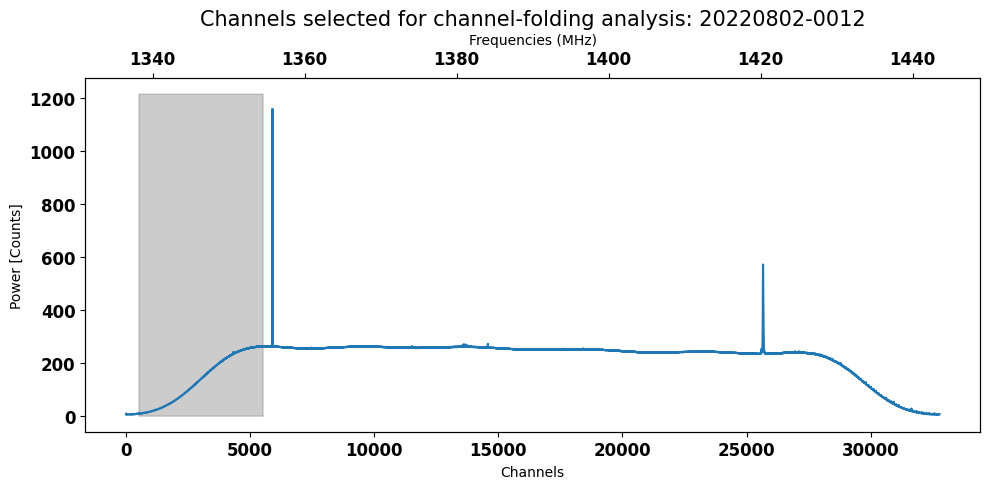

In [7]:
# Checking the folding spectrum and getting the residuals for both cross and auto correlation
observation_id = '1661209291_auto'

print(' ')
print('Auto correlation spectrum  ')
max_res_auto  = (art.mean_spectra_folded_residuals(vis_auto, cp_loaded_auto, d,500,5500)) 



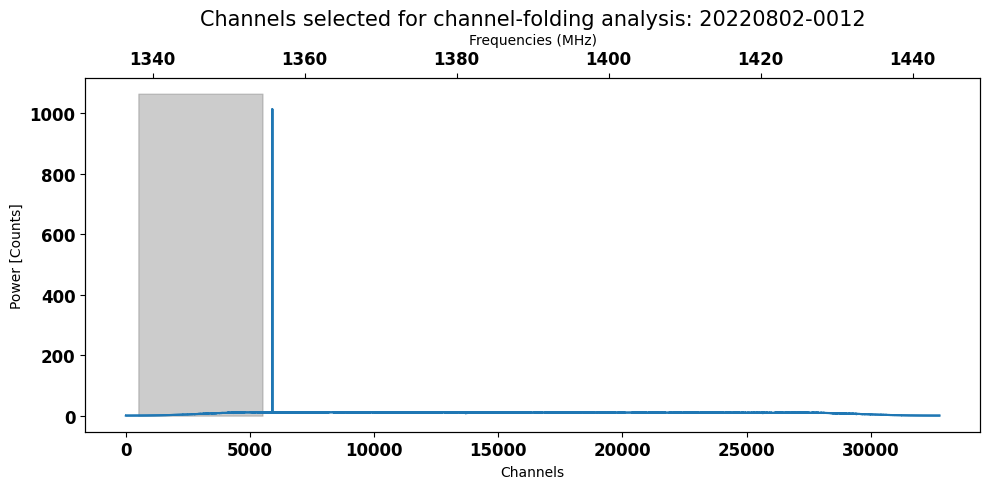

In [8]:
#------------ Cross correlation ___________________________________

print(' ')
#print('Cross correlation spectrum  ')
max_res_cross  = art.mean_spectra_folded_residuals(vis_cross, cp_loaded_cross, d,500,5500) 

# 4. Reading and visualizing artifacts

In [9]:

def residual_plot():
    
    

    fig, axs = plt.subplots(2,1, figsize=(8,7), sharex=True)
    axs[0].scatter(ind_h, data_h, s=20, color='blue',label='H-pol')
    axs[0].scatter(ind_v, data_v, s=20,color='red', label='V-pol')
    
    axs[0].axhline(y=4,c="black",linewidth=3,label='Maximum Threshold')
    
    axs[0].grid()
    axs[0].legend()
    axs[0].set_ylabel('Max Residual')
    axs[0].set_xlim([-1,64])
    axs[0].set_xlabel('Antenna Index')
    axs[0].set_title('Auto correlation Max absolute folding residual x {}',fontsize=15)
    
    axs[1].scatter(ind_cross_h, (np.array(data_cross_h)), s=20, color='blue',label='H-pol')
    axs[1].scatter(ind_cross_v, (np.array(data_cross_v)), s=20,color='red', label='V-pol')
    
    axs[1].axhline(y=4,c="black",linewidth=3,label= 'Maximum Threshold')
    #axs[1].axhline(y=4,c="red",linewidth=3, label='V-pol threshold')
    
    axs[1].grid()
    axs[1].legend()
    axs[1].set_ylabel('Max Residual')
    axs[1].set_xlim([-1,64])
    axs[1].set_xlabel('Antenna Index')
    axs[1].set_title('Cross correlation Max absolute folding residual x {}',fontsize=15)
    
    plt.tight_layout()
    plt.show()

In [10]:


ind_cross_h, dat_cross_h, Att_cross_h, ind_cross_v, dat_cross_v, Att_cross_v = art.artifacts(cp_cross,max_res_cross )
ind_h, dat_h, H_pol_attennas_auto, ind_v, dat_v, V_pol_attennas_auto = art.artifacts(cp_auto,max_res_auto )


# Z-score normalization z = (x-mean)/std


data_cross_h = art.normalize_mean_std(dat_cross_h)
data_cross_v = art.normalize_mean_std((dat_cross_v))

data_h = art.normalize_mean_std((dat_h))
data_v = art.normalize_mean_std((dat_v))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


standard deviation
 
0.9999999999999999 1.0 1.0 1.0000000000000002
 


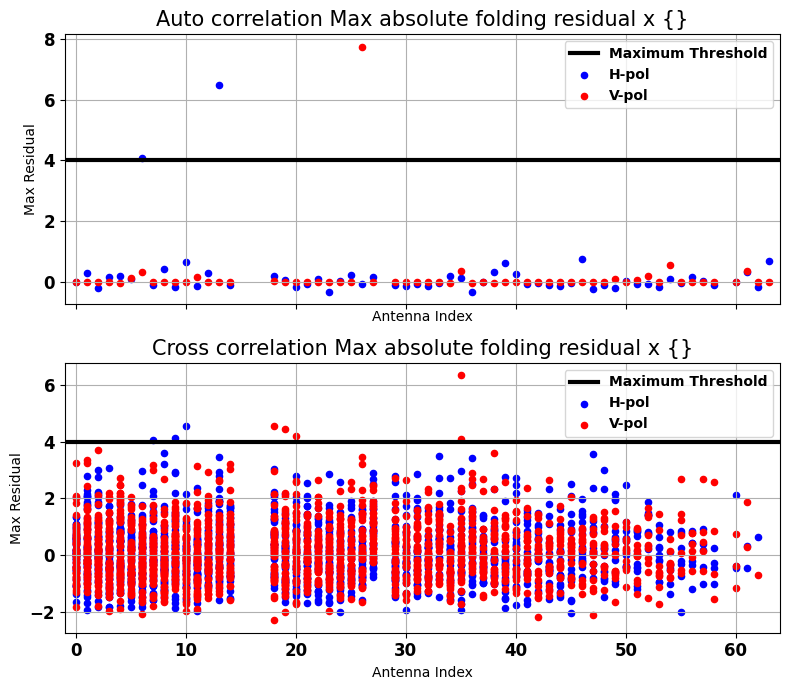

In [11]:
print('standard deviation')
print(' ')
print(np.std(data_cross_h), np.std(data_cross_v), np.std(data_h), np.std(data_v) )
print(' ')

residual_plot()


# 5. Visualizing the data using matrixes

In [12]:
# H polarzation matrx

cross_correlation_matrix =  art.matrix_(Att_cross_h,abs(data_cross_h) )
auto_correlation_matrix = art.matrix_(H_pol_attennas_auto,abs(data_h) )

# V polarization matrix 
cross_correlation_matrix_V =  art.matrix_(Att_cross_v,abs(data_cross_v ))
auto_correlation_matrix_V =  art.matrix_(V_pol_attennas_auto,abs(data_v ))


# Merging the cross and auto correlation matrix 

final_matrix_h = np.copy(cross_correlation_matrix )

for i in range(len(cross_correlation_matrix)):
    for j in range(len(cross_correlation_matrix[i])):
          if i == j:
                final_matrix_h[i][j] = (auto_correlation_matrix[i][j])


                
                


# Merging the cross and auto correlation matrix 

final_matrix_v = np.copy(cross_correlation_matrix_V )

for i in range(len(cross_correlation_matrix_V)):
    for j in range(len(cross_correlation_matrix_V[i])):
        if i == j:
            final_matrix_v[i][j] = auto_correlation_matrix_V[i][j]
            

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


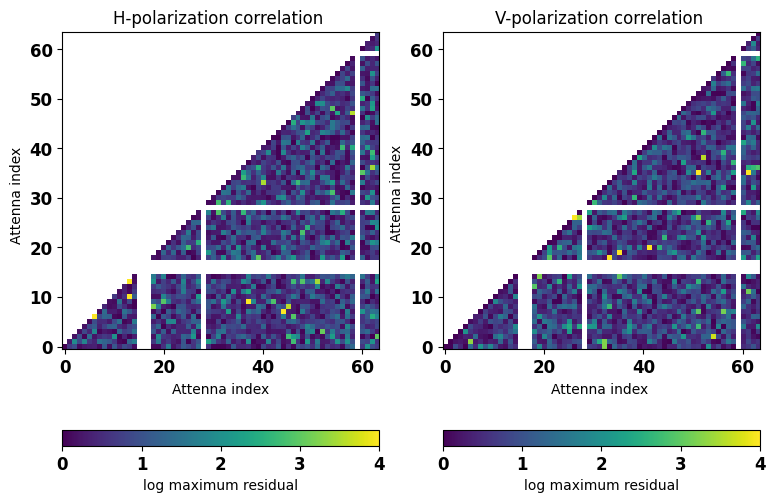

In [13]:
fig, ax = plt.subplots(1, 2,figsize=(9, 7))


cmap = plt.get_cmap('seismic_r',10)


im3 = ax[1].imshow((final_matrix_v),vmin=0,vmax=4, origin='lower', interpolation='None', aspect='equal')

im2 = ax[0].imshow((final_matrix_h), vmin=0,vmax=4, origin='lower', interpolation='None', aspect='equal')



fig.colorbar(im3, orientation="horizontal",ax=ax[1],label='log maximum residual')
fig.colorbar(im2,orientation="horizontal",ax=ax[0],label='log maximum residual')


ax[0].set_xlabel('Attenna index')
ax[0].set_ylabel('Attenna index  ')
ax[0].set_title('H-polarization correlation ')


ax[1].set_xlabel('Attenna index ')
ax[1].set_ylabel('Attenna index ')
ax[1].set_title('V-polarization correlation ')


plt.show()

# 6. Identifying maximum residuals antenna index

In [14]:
V_artifact_attenna = art.identify_max_res(final_matrix_v)


H_artifact_attenna = art.identify_max_res(final_matrix_h)

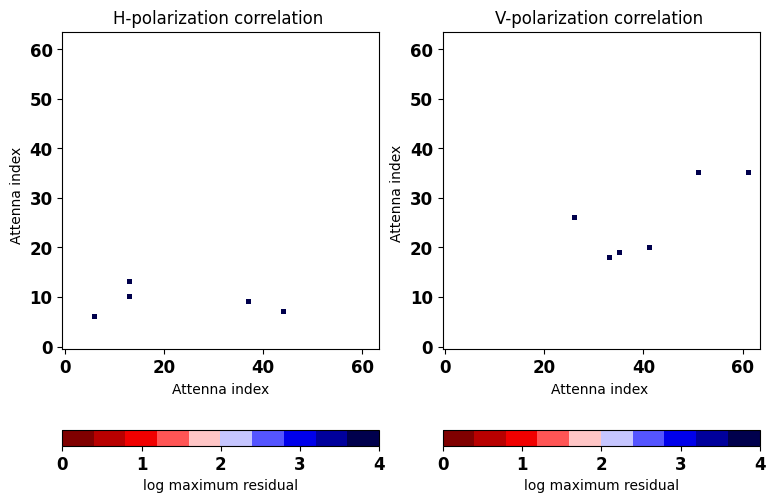

In [15]:
fig, ax = plt.subplots(1, 2,figsize=(9, 7))


cmap = plt.get_cmap('seismic_r',10)


im3 = ax[1].imshow((V_artifact_attenna),cmap=cmap,vmin=0,vmax=4, origin='lower', interpolation='None', aspect='equal')

im2 = ax[0].imshow((H_artifact_attenna),cmap=cmap, vmin=0,vmax=4, origin='lower', interpolation='None', aspect='equal')



fig.colorbar(im3, orientation="horizontal",ax=ax[1],label='log maximum residual')
fig.colorbar(im2,orientation="horizontal",ax=ax[0],label='log maximum residual')


ax[0].set_xlabel('Attenna index')
ax[0].set_ylabel('Attenna index  ')
ax[0].set_title('H-polarization correlation ')


ax[1].set_xlabel('Attenna index ')
ax[1].set_ylabel('Attenna index ')
ax[1].set_title('V-polarization correlation ')


plt.show()

# 7. Which attena index with possibilities of artifacts

In [16]:
def attenna_res_info(matrix):
    
    threshold = 4
    

    
    final_matrix_h_normalized =  np.copy(matrix)
    maximum_residual_h = threshold
    

    condition = (final_matrix_h_normalized >= maximum_residual_h)
    location = np.argwhere(condition == True) 

    residual_list_h =[]
    no_of_offending_attenas_h = 0

    for i in location: 
        no_of_offending_attenas_h = no_of_offending_attenas_h +1
        residual_list_h.append(i)

    print(' ')
    print('Number of offending  baselines = ' + str(no_of_offending_attenas_h))
    print(' ')
    print('List of the offending attenna pairs :' )
    print(' ')
    print((residual_list_h))

    print(' ')
    
    return residual_list_h

In [17]:
print('Possible offending antennas')
print(' ')
print('------- ')
print(' ')
print('H auto correlation')
residual_list_h_auto = attenna_res_info(auto_correlation_matrix)

print('------- ')
print(' ')

print('V auto correlation')
residual_list_v_auto = attenna_res_info(auto_correlation_matrix_V)

print('------- ')
print(' ')

print('V cross correlation')
residual_list_v_cross = attenna_res_info(cross_correlation_matrix_V)
print('------- ')
print(' ')

print('H cross correlation')
residual_list_h_cross = attenna_res_info(cross_correlation_matrix)



Possible offending antennas
 
------- 
 
H auto correlation
 
Number of offending  baselines = 2
 
List of the offending attenna pairs :
 
[array([6, 6]), array([13, 13])]
 
------- 
 
V auto correlation
 
Number of offending  baselines = 1
 
List of the offending attenna pairs :
 
[array([26, 26])]
 
------- 
 
V cross correlation
 
Number of offending  baselines = 5
 
List of the offending attenna pairs :
 
[array([18, 33]), array([19, 35]), array([20, 41]), array([35, 51]), array([35, 61])]
 
------- 
 
H cross correlation
 
Number of offending  baselines = 3
 
List of the offending attenna pairs :
 
[array([ 7, 44]), array([ 9, 37]), array([10, 13])]
 


In [18]:
residual_list_h_cross[0]

array([ 7, 44])

In [19]:
cp_loaded_cross

array([['m000h', 'm001h'],
       ['m000h', 'm002h'],
       ['m001h', 'm002h'],
       ...,
       ['m027v', 'm062v'],
       ['m027v', 'm063v'],
       ['m029v', 'm063v']], dtype='<U5')

# 8. Visualizing / plotting the possible offending attenas 

In [20]:
offending_antenna_h_auto = art.offending_antenna_idx_h(residual_list_h_auto)

offending_antenna_v_auto = art.offending_antenna_idx_v(residual_list_v_auto)

offending_antenna_h_cross = art.offending_antenna_idx_h(residual_list_h_cross)

offending_antenna_v_cross = art.offending_antenna_idx_v(residual_list_v_cross)

 # 9. Visualizing  artefacts spectrum

In [22]:
def artefact_spectra_visualize(cp_loaded_auto,vis_auto,d_auto,offending_antenna,Title):
    
    
    
    show_fold_selection = True
    #ch_fold = np.s_[7000:25000]
    fold_factor_list = 64
    dp_start = 2

    
    # Compute inputs with artefacts above threshold
    bad_recs = []

    index_auto = []
    index_cross = []

    empty = []
    
    for ii_cp in range(cp_loaded_auto.shape[0]):
        cp_tup = cp_loaded_auto[ii_cp,:]

        for rec in offending_antenna:

            if str(cp_tup[0]) == rec[0] and str(cp_tup[1]) ==rec[1]:
                index_auto.append(ii_cp)
                print(cp_tup,ii_cp)


   
    
    # Number of visibilities to plot per figure:
    vis_per_fig = 3

    # Determine number of plots
    n_plts = np.ceil(len(offending_antenna)/vis_per_fig).astype(int) # ceil.. takes the nearest whole number, cp_load = number of atifact
    
    if n_plts == 1 :
        
        fig, ax2 = plt.subplots(figsize=(10,4))
            
        for i in index_auto:
        
            idx =  i
            cp_tup = cp_loaded_auto[idx,:]
            cp_mean = np.abs(np.mean(vis_auto[dp_start:,:,idx], axis=0))


            ax2.plot(d_auto.freqs/1e6, 10*np.log10(cp_mean), label=str(cp_tup))
            ax2.set_xlabel('Frequency [MHz]')
            ax2.set_ylabel('Power [dB]')
            ax2.set_title(str(Title))
            ax2.legend(loc = 'lower center')

        
        
        
    if n_plts > 1: 
        
        fig, ax = plt.subplots(n_plts, 1, figsize=(10,n_plts*5))
    
        for i,p in enumerate(index_auto):
        
            idx =  p
            cp_tup = cp_loaded_auto[idx,:]
            cp_mean = np.abs(np.mean(vis_auto[dp_start:,:,idx], axis=0))

            ax[i//vis_per_fig].plot(d_auto.freqs/1e6, 10*np.log10(cp_mean), label=str(cp_tup))
            ax[i//vis_per_fig].set_xlabel('Frequency [MHz]')
            ax[i//vis_per_fig].set_ylabel('Power [dB]')
            ax[i//vis_per_fig].set_title(str(Title))
            ax[i//vis_per_fig].legend(loc = 'lower center')



        
    

    plt.tight_layout()
    plt.show()
    
    
    

['m006h' 'm006h'] 6
['m013h' 'm013h'] 13


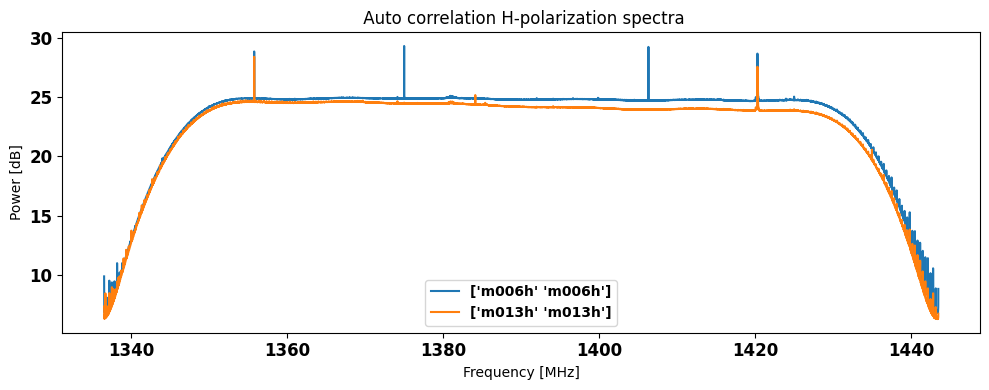

None


In [23]:

print (artefact_spectra_visualize(cp_auto,vis_auto,d,offending_antenna_h_auto,Title=' Auto correlation H-polarization spectra' ) )




['m026v' 'm026v'] 82


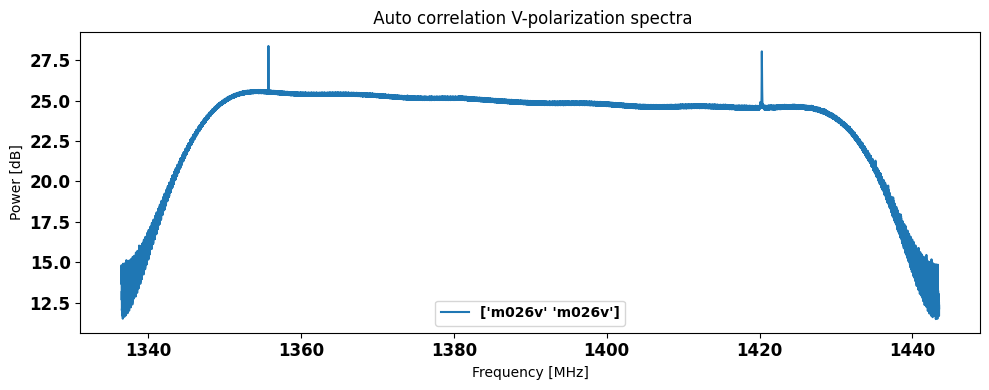

In [24]:

artefact_spectra_visualize(cp_auto,vis_auto,d,offending_antenna_v_auto,Title=' Auto correlation V-polarization spectra' ) 






['m010h' 'm013h'] 88
['m009h' 'm037h'] 536
['m007h' 'm044h'] 1521


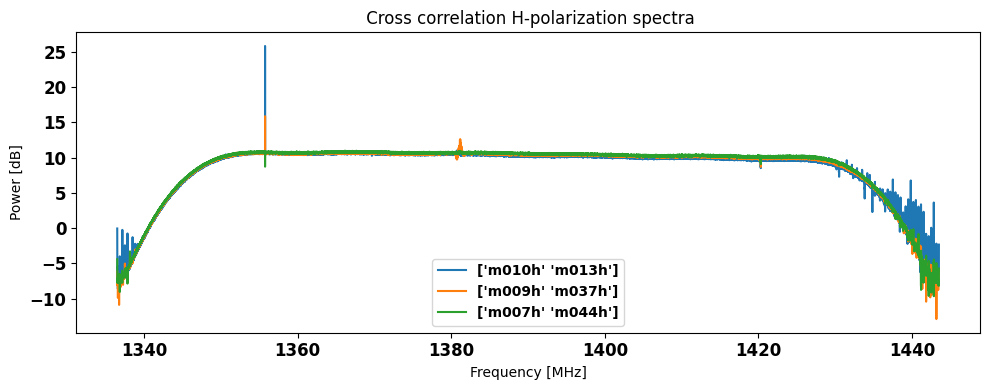

None


In [25]:

print (artefact_spectra_visualize(cp_cross,vis_cross,d,offending_antenna_h_cross,Title=' Cross correlation H-polarization spectra' ) )




['m018v' 'm033v'] 2132
['m019v' 'm035v'] 2192
['m020v' 'm041v'] 2379
['m035v' 'm051v'] 2703
['m035v' 'm061v'] 2982


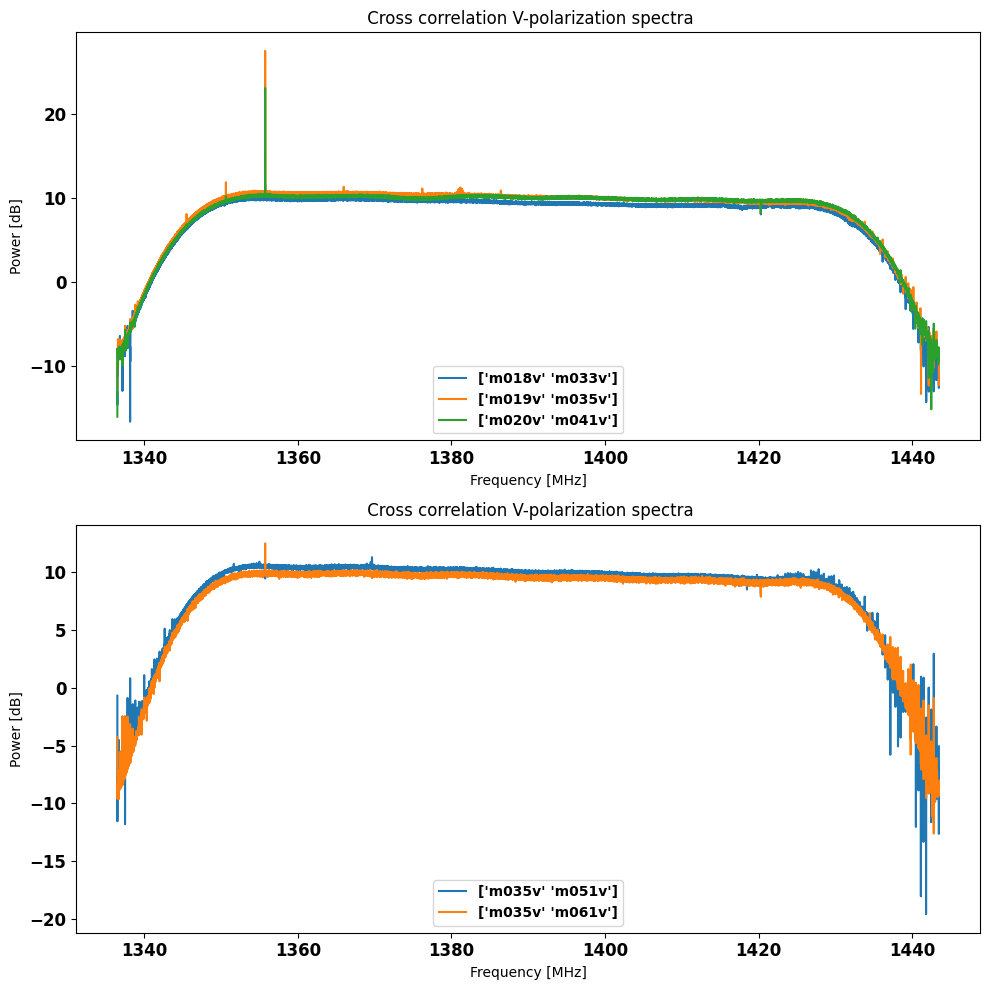

None


In [26]:
print (artefact_spectra_visualize(cp_cross,vis_cross,d,offending_antenna_v_cross,Title=' Cross correlation V-polarization spectra' ) )


